In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

Informasi terkait tabel:


1. user_name	= The name of the user, as they’ve defined it.

2. user_location =	The user-defined location for this account’s profile.

3. user_description =	The user-defined UTF-8 string describing their account.

4. user_created =	Time and date, when the account was created.

5. user_followers =	The number of followers an account currently has.

6. user_friends =	The number of friends an account currently has.

7. user_favourites =	The number of favorites an account currently has

8. user_verified =	When true, indicates that the user has a verified account

9. date =	UTC time and date when the Tweet was created

10. text =	The actual UTF-8 text of the Tweet

11. hashtags =	All the other hashtags posted in the tweet along with #Bitcoin & #btc

12. source =	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web

13. is_retweet =	Indicates whether this Tweet has been Retweeted by the authenticating user.

# DATA LOADING

In [2]:
df = pd.read_csv('Bitcoin_tweets.csv')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573250,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False
2573251,nadya,KİEV,BİTC0İN\n\nCAN U SEND GİFT PLS F0R WAR :(\n\nI...,2022-03-14 19:29:12,0.0,0.0,0.0,False,2022-03-14 19:37:32,TEwL3iCv1Xyn3Vr7C6CHMqdS36ixA6QWvc\n\ncan you ...,"['Bitcoin', 'bitcoins', 'BTC']",Twitter Web App,False
2573252,Crypto Cobra,NaN,OVER 100K FOLLOWERS ON TELEGRAM https://t.co/R...,2021-08-29 04:38:25,2105.0,68.0,34.0,False,2022-03-14 19:37:28,#TOP01 LOSSER LIST TODAY 14/03/22 📢\n\n#IMX/US...,"['TOP01', 'IMX', 'BTC', 'Binance', 'Coinbase',...",Twitter for iPhone,False
2573253,Cryptonia,NaN,🤖 #crypto #trading,2017-09-22 10:00:27,420.0,137.0,5568.0,False,2022-03-14 19:37:26,I am the only crazy person here? \n\n#btc #alts,"['btc', 'alts']",Twitter for iPhone,False


Data ada emoticon, ada hastag , ada url dan ada \n\.
mungkin yang berhubungan dengan user yang perlu dipake cuman followers sama verified dan tanggal tweet dibuat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573255 entries, 0 to 2573254
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 255.2+ MB


semuanya object dan hanya followers saja yang float. jika dilihat dari tabel, friends dan favourites seharusnya terbaca float

In [5]:
df.isnull().sum()

user_name                31
user_location       1261627
user_description     318865
user_created            178
user_followers          225
user_friends            225
user_favourites         225
user_verified           225
date                    225
text                    225
hashtags              17263
source                 3845
is_retweet              531
dtype: int64

semuanya punya missing values

In [6]:
#cleaning missing values
df_clean = df.dropna(subset=(['user_name', 
                                'user_created', 
                                'user_followers', 
                                'user_friends', 
                                'user_favourites', 
                                'user_verified', 
                                'date', 
                                'text', 
                                'source', 
                                'is_retweet']))
df_clean.reset_index(drop=True, inplace= True)

In [7]:
df_clean.isnull().sum()

user_name                 0
user_location       1259293
user_description     318671
user_created              0
user_followers            0
user_friends              0
user_favourites           0
user_verified             0
date                      0
text                      0
hashtags              15675
source                    0
is_retweet                0
dtype: int64

label disini adalah is_retweet. kita bakalan buat label baru yang berupa sentiment tersebut.

In [8]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\4103588557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = pd.to_datetime(df_clean['date'])


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569379 entries, 0 to 2569378
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_name         object        
 1   user_location     object        
 2   user_description  object        
 3   user_created      object        
 4   user_followers    float64       
 5   user_friends      object        
 6   user_favourites   object        
 7   user_verified     object        
 8   date              datetime64[ns]
 9   text              object        
 10  hashtags          object        
 11  source            object        
 12  is_retweet        object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 254.8+ MB


In [10]:
df_clean.date.sort_values(ascending=True)

21296     2021-02-05 10:52:04
21297     2021-02-05 10:52:04
21295     2021-02-05 10:52:06
21294     2021-02-05 10:52:07
21293     2021-02-05 10:52:26
                  ...        
2430585   2022-03-19 23:59:50
2430311   2022-03-19 23:59:50
2430584   2022-03-19 23:59:51
2430583   2022-03-19 23:59:54
2430582   2022-03-19 23:59:56
Name: date, Length: 2569379, dtype: datetime64[ns]

In [11]:
g = df_clean.groupby(df_clean['date'].dt.date).apply(lambda x: x['date'].sample(n=300,replace=True)).to_numpy()
df_clean['random_sample'] = np.where(df_clean.date.isin(g), 'Yes', 'No')

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\1220662937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['random_sample'] = np.where(df_clean.date.isin(g), 'Yes', 'No')


In [12]:
df_clean

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,No
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Yes
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,No
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,No
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False,Yes
2569375,nadya,KİEV,BİTC0İN\n\nCAN U SEND GİFT PLS F0R WAR :(\n\nI...,2022-03-14 19:29:12,0.0,0.0,0.0,False,2022-03-14 19:37:32,TEwL3iCv1Xyn3Vr7C6CHMqdS36ixA6QWvc\n\ncan you ...,"['Bitcoin', 'bitcoins', 'BTC']",Twitter Web App,False,Yes
2569376,Crypto Cobra,NaN,OVER 100K FOLLOWERS ON TELEGRAM https://t.co/R...,2021-08-29 04:38:25,2105.0,68.0,34.0,False,2022-03-14 19:37:28,#TOP01 LOSSER LIST TODAY 14/03/22 📢\n\n#IMX/US...,"['TOP01', 'IMX', 'BTC', 'Binance', 'Coinbase',...",Twitter for iPhone,False,No
2569377,Cryptonia,NaN,🤖 #crypto #trading,2017-09-22 10:00:27,420.0,137.0,5568.0,False,2022-03-14 19:37:26,I am the only crazy person here? \n\n#btc #alts,"['btc', 'alts']",Twitter for iPhone,False,No


In [13]:
df_clean = df_clean[(df_clean.random_sample == 'Yes')]
df_clean

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Yes
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,Yes
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes
25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288,2656,False,2021-02-10 23:44:43,#Bitcoin #BTC #ADA #DOT Mastercard Will Let Me...,"['Bitcoin', 'BTC', 'ADA', 'DOT']",Twitter for iPhone,False,Yes
52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696,14546,False,2021-02-10 23:31:35,If I was to ask every bitcoin whale for a chan...,NaN,Twitter for iPhone,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569348,Space Eco System,The Moon,The Space Field Game is a decentralized game b...,2022-03-05 11:02:20,922.0,0.0,7.0,False,2022-03-14 19:39:38,🧑‍🚀The Space Field Game has started!\n\nBuy $S...,"['Crypto', 'Token', 'Defi', 'Staking', 'DApp',...",Twitter for iPhone,False,Yes
2569358,Anna,Seattle,"#NFT newbie，Travelers who like art, life, foodies",2012-11-09 16:05:42,860.0,54.0,1426.0,False,2022-03-14 19:38:44,Are you scared of #BTC crashing again?,['BTC'],Twitter Web App,False,Yes
2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,"['BTC', 'Bitcoin']",Twitter Web App,False,Yes
2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False,Yes


## EXPLORATION DATA ANALYSIS

In [14]:
from langdetect import detect

In [15]:
#drop invalid language
invalid_text = []
valid_text = []

for i in df_clean.index:
  try:
    a = detect(df_clean.at[i,'text'])
    valid_text.append(a)
  except: 
    invalid_text.append(i)
    
data = df_clean.drop(index =invalid_text)

#create new columns of language
# data['language'] = data['text'].map(lambda desc: detect(desc))
# data.head()

In [16]:
data['lang'] = valid_text

In [17]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample,lang
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Yes,en
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,Yes,en
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes,en
25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288,2656,False,2021-02-10 23:44:43,#Bitcoin #BTC #ADA #DOT Mastercard Will Let Me...,"['Bitcoin', 'BTC', 'ADA', 'DOT']",Twitter for iPhone,False,Yes,en
52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696,14546,False,2021-02-10 23:31:35,If I was to ask every bitcoin whale for a chan...,NaN,Twitter for iPhone,False,Yes,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569348,Space Eco System,The Moon,The Space Field Game is a decentralized game b...,2022-03-05 11:02:20,922.0,0.0,7.0,False,2022-03-14 19:39:38,🧑‍🚀The Space Field Game has started!\n\nBuy $S...,"['Crypto', 'Token', 'Defi', 'Staking', 'DApp',...",Twitter for iPhone,False,Yes,en
2569358,Anna,Seattle,"#NFT newbie，Travelers who like art, life, foodies",2012-11-09 16:05:42,860.0,54.0,1426.0,False,2022-03-14 19:38:44,Are you scared of #BTC crashing again?,['BTC'],Twitter Web App,False,Yes,en
2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,"['BTC', 'Bitcoin']",Twitter Web App,False,Yes,en
2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False,Yes,en


In [18]:
import re

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Total Language: 32


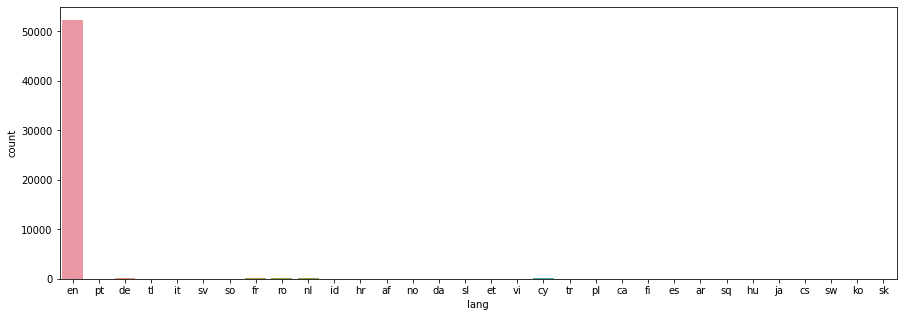

In [20]:
fig,ax = plt.subplots(figsize=(15,5))

sns.countplot(x="lang", data=data, ax=ax);
print('Total Language:', data.lang.nunique())

There is 33 language used for tweets. we will use only english language.

In [21]:
data = data[(data.lang == 'en')]
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample,lang
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Yes,en
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,Yes,en
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes,en
25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288,2656,False,2021-02-10 23:44:43,#Bitcoin #BTC #ADA #DOT Mastercard Will Let Me...,"['Bitcoin', 'BTC', 'ADA', 'DOT']",Twitter for iPhone,False,Yes,en
52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696,14546,False,2021-02-10 23:31:35,If I was to ask every bitcoin whale for a chan...,NaN,Twitter for iPhone,False,Yes,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569348,Space Eco System,The Moon,The Space Field Game is a decentralized game b...,2022-03-05 11:02:20,922.0,0.0,7.0,False,2022-03-14 19:39:38,🧑‍🚀The Space Field Game has started!\n\nBuy $S...,"['Crypto', 'Token', 'Defi', 'Staking', 'DApp',...",Twitter for iPhone,False,Yes,en
2569358,Anna,Seattle,"#NFT newbie，Travelers who like art, life, foodies",2012-11-09 16:05:42,860.0,54.0,1426.0,False,2022-03-14 19:38:44,Are you scared of #BTC crashing again?,['BTC'],Twitter Web App,False,Yes,en
2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,"['BTC', 'Bitcoin']",Twitter Web App,False,Yes,en
2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False,Yes,en


In [22]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [23]:
#clean df 
def cleaning(data):
    text = re.sub(r'http\S+',' ', data)  #remove urls
    text = re.sub(r'@\w+',' ', text) #remove mentions
    text = re.sub(r'#\w+', ' ', text) #remove hashtag
    text = re.sub('[^A-Za-z]+', ' ', text) #remove characters that not use in the english alphabets
    text = text.lower() #lower caps
    text = re.sub('\w*\d\w*','', text) #remove digit
    

    return text

In [24]:
data['cleaned_text'] = data['text'].apply(cleaning)
data['cleaned_text']

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\879978240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].apply(cleaning)


1           today that s this we will do a take with our ...
5            trade on enjoy of the trading fee sign up link 
8           rsr i know i told you guys the target was i k...
25          mastercard will let merchants accept payments...
52         if i was to ask every bitcoin whale for a chan...
                                 ...                        
2569348     the space field game has started buy spo amp ...
2569358                    are you scared of crashing again 
2569371     the majority of users will be just watching t...
2569374    this should tell you plenty do not hold paper ...
2569375    tewl icv xyn vr c chmqds ixa qwvc can you help...
Name: cleaned_text, Length: 52322, dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\3813806631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet_length"] = data["cleaned_text"].apply(len)


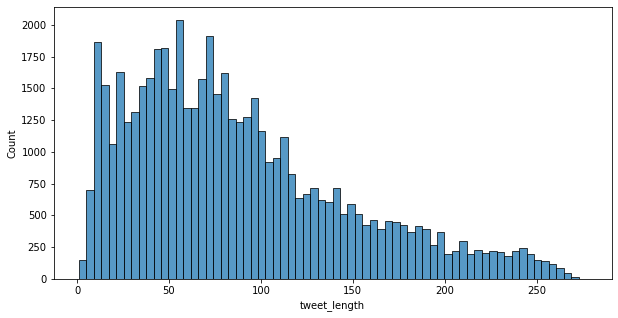

In [25]:
data["tweet_length"] = data["cleaned_text"].apply(len)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x="tweet_length");

mean of num word: 16.309315393142462
min of num words: 0
max of num word: 62


C:\Users\HP\AppData\Local\Temp\ipykernel_27044\2308648357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_words"] = data["cleaned_text"].apply(count_words)


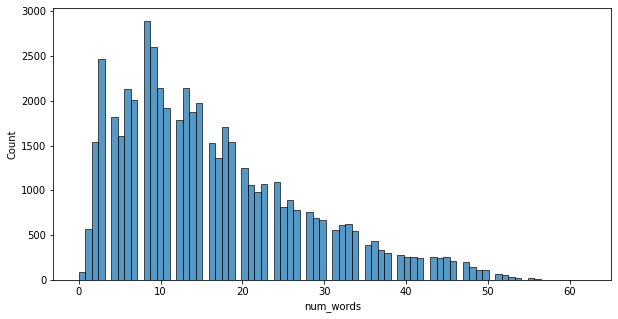

In [26]:
def count_words(x):
    return len(x.split())

data["num_words"] = data["cleaned_text"].apply(count_words)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x="num_words");
print('mean of num word:', data.num_words.mean())
print('min of num words:',min(data["num_words"]))
print('max of num word:',max(data["num_words"]) )

## common words with wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS

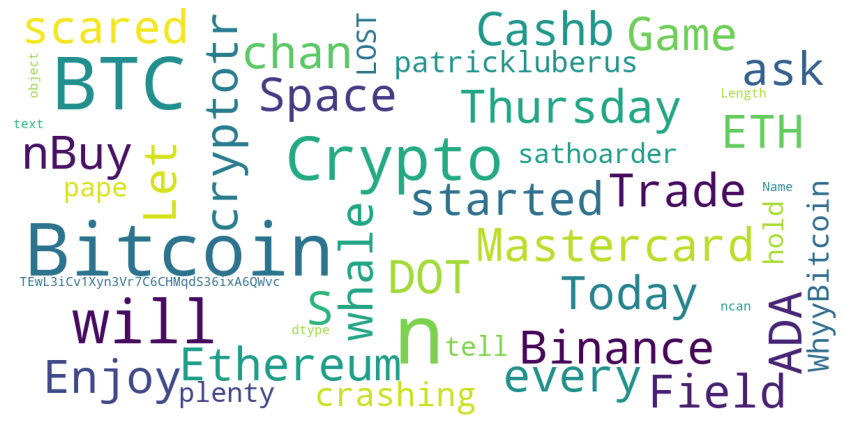

In [28]:
stopwords = set(STOPWORDS)

def wc(data,title= None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 40,
        scale= 3,
        random_state = 1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()


wc(data['text'])


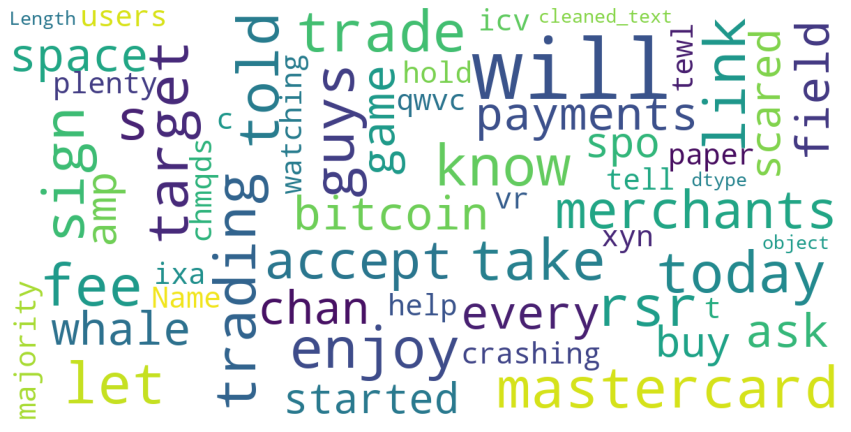

In [29]:
wc(data['cleaned_text'])

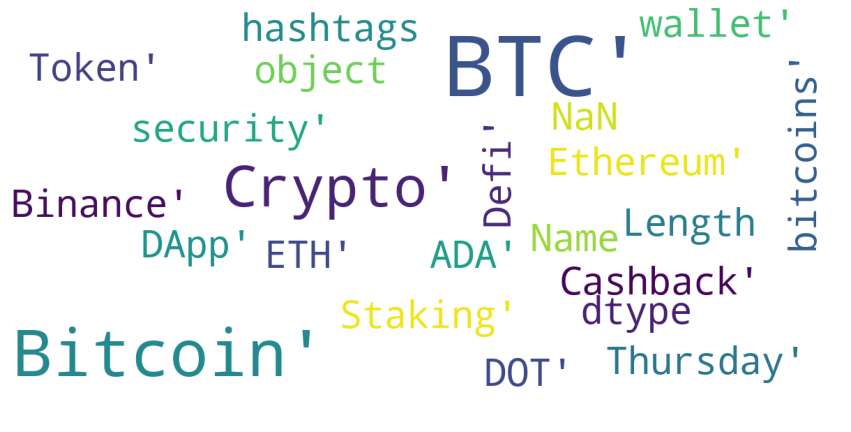

In [30]:
wc(data['hashtags'])

## Sentiment analysis

In [31]:
import nltk

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
sid = SentimentIntensityAnalyzer()

In [36]:
data['vader'] = data['text'].apply(lambda desc: sid.polarity_scores(desc))

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\4204438934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vader'] = data['text'].apply(lambda desc: sid.polarity_scores(desc))


In [41]:
data['compound'] = data['vader'].apply(lambda score_dict: score_dict['compound'])
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\432833194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound'] = data['vader'].apply(lambda score_dict: score_dict['compound'])


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample,lang,cleaned_text,tweet_length,num_words,vader,compound
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Yes,en,today that s this we will do a take with our ...,58,13,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.4939
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,Yes,en,trade on enjoy of the trading fee sign up link,48,10,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4939
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes,en,rsr i know i told you guys the target was i k...,53,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288,2656,False,2021-02-10 23:44:43,#Bitcoin #BTC #ADA #DOT Mastercard Will Let Me...,"['Bitcoin', 'BTC', 'ADA', 'DOT']",Twitter for iPhone,False,Yes,en,mastercard will let merchants accept payments...,71,11,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.3818
52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696,14546,False,2021-02-10 23:31:35,If I was to ask every bitcoin whale for a chan...,NaN,Twitter for iPhone,False,Yes,en,if i was to ask every bitcoin whale for a chan...,104,23,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6808


In [43]:
data['sentiment_vader'] = ''
data.loc[data.compound>0, 'sentiment_vader']='POSITIVE'
data.loc[data.compound==0, 'sentiment_vader']='NEUTRAL'
data.loc[data.compound<0, 'sentiment_vader']='NEGATIVE'

C:\Users\HP\AppData\Local\Temp\ipykernel_27044\3676388214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_vader'] = ''
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


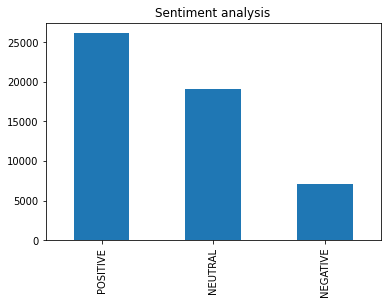

In [47]:
data.sentiment_vader.value_counts().plot(kind='bar', title='Sentiment analysis');

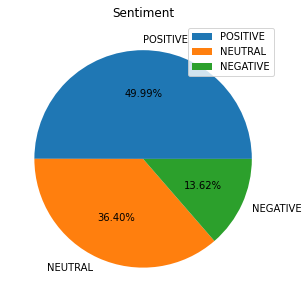

In [50]:
fig,ax = plt.subplots(figsize=(10,5))
plt.pie(data.sentiment_vader.value_counts(),labels=data.sentiment_vader.unique(), autopct='%.2f%%')
ax.set_title('Sentiment')
plt.legend()

# DATA PREPROCESSING

In [86]:
#split dataset
X = data['cleaned_text']
y= pd.get_dummies(data['sentiment_vader']).values

In [87]:
X

1           today that s this we will do a take with our ...
5            trade on enjoy of the trading fee sign up link 
8           rsr i know i told you guys the target was i k...
25          mastercard will let merchants accept payments...
52         if i was to ask every bitcoin whale for a chan...
                                 ...                        
2569348     the space field game has started buy spo amp ...
2569358                    are you scared of crashing again 
2569371     the majority of users will be just watching t...
2569374    this should tell you plenty do not hold paper ...
2569375    tewl icv xyn vr c chmqds ixa qwvc can you help...
Name: cleaned_text, Length: 52322, dtype: object

In [88]:
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
#split to train adnd test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

#split to train and val set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=16)

## Tokenisasi

In [91]:
# function for tokenization
from nltk.tokenize import word_tokenize
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [92]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#function stopwords
def remove_stopwords(text):
    output = [i for i in text if i not in stop_words]
    return output

In [93]:
from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
word_lemmatizer = WordNetLemmatizer()

#function of lemmatization
def lemmatizer(text):
    lemma = [word_lemmatizer.lemmatize(word) for word in text]
    return lemma

In [94]:
#make a function of preprocess
def cleaned(text):
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

In [95]:
X_train_c = X_train.copy()

In [96]:
X_test_c = X_test.copy()
X_val_c = X_val.copy()

In [97]:
X_train_token = X_train_c.apply(lambda row: cleaned(row))

In [98]:
X_val_token = X_val_c.apply(lambda row: cleaned(row))
X_test_token = X_test_c.apply(lambda row: cleaned(row))

## Label Encoder

In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [100]:
import tensorflow as tf

In [101]:
from tensorflow.keras.utils import to_categorical

In [102]:
y_train_c = y_train.copy()
y_test_c = y_test.copy()
y_val_c = y_val.copy()

In [103]:
y_train_c

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

## Vektorisasi

In [105]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

t = Tokenizer(oov_token='UNK')
t.fit_on_texts(X_train_token)

In [106]:
#Turns string into lists of integer indices
X_train_seq = t.texts_to_sequences(X_train_token)
X_val_seq = t.texts_to_sequences(X_val_token)
X_test_seq = t.texts_to_sequences(X_test_token)

In [107]:
# show the vocab
word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21200 unique tokens.


In [108]:
# defining max length
tem = 0
for i in range(len(X_train_seq)):
    tem += len(X_train_seq[i])
maxlenght = int(tem/len(X_train_seq))
print(maxlenght)

9


In [122]:
X_train_done = pad_sequences(X_train_seq, maxlen = maxlenght, padding = 'post')
X_val_done = pad_sequences(X_val_seq, maxlen = maxlenght, padding = 'post')
X_test_done = pad_sequences(X_test_seq, maxlen = maxlenght, padding = 'post')

In [117]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten, Input

model = Sequential([
                    Embedding(21200, 128, input_length=maxlenght),
                    LSTM(200, return_sequences=True),
                    LSTM(100),
                    Dense(3, activation='softmax')
])

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 9, 128)            2713600   
                                                                 
 lstm_4 (LSTM)               (None, 9, 200)            263200    
                                                                 
 lstm_5 (LSTM)               (None, 100)               120400    
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 3,097,503
Trainable params: 3,097,503
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
)

In [123]:
train = model.fit(X_train_done,y_train_c,epochs=10,validation_data=(X_val_done,y_val_c))

Epoch 1/10
1178/1178 [==============================] - 44s 35ms/step - loss: 0.4760 - accuracy: 0.8123 - val_loss: 0.3839 - val_accuracy: 0.8626
Epoch 2/10
1178/1178 [==============================] - 40s 34ms/step - loss: 0.2602 - accuracy: 0.9085 - val_loss: 0.3893 - val_accuracy: 0.8622
Epoch 3/10
1178/1178 [==============================] - 37s 32ms/step - loss: 0.1751 - accuracy: 0.9401 - val_loss: 0.4712 - val_accuracy: 0.8602
Epoch 4/10
1178/1178 [==============================] - 35s 30ms/step - loss: 0.1234 - accuracy: 0.9586 - val_loss: 0.4471 - val_accuracy: 0.8569
Epoch 5/10
1178/1178 [==============================] - 36s 31ms/step - loss: 0.0856 - accuracy: 0.9713 - val_loss: 0.5779 - val_accuracy: 0.8521
Epoch 6/10
1178/1178 [==============================] - 35s 29ms/step - loss: 0.0624 - accuracy: 0.9788 - val_loss: 0.6505 - val_accuracy: 0.8512
Epoch 7/10
1178/1178 [==============================] - 38s 32ms/step - loss: 0.0443 - accuracy: 0.9848 - val_loss: 0.7499 -

In [124]:
metrics =pd.DataFrame(train.history) #history kedua untuk mengakses history
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.475965,0.812296,0.383877,0.862637
1,0.260166,0.908471,0.389345,0.862160
2,0.175072,0.940087,0.471156,0.860248
3,0.123383,0.958615,0.447150,0.856904
4,0.085573,0.971278,0.577940,0.852126


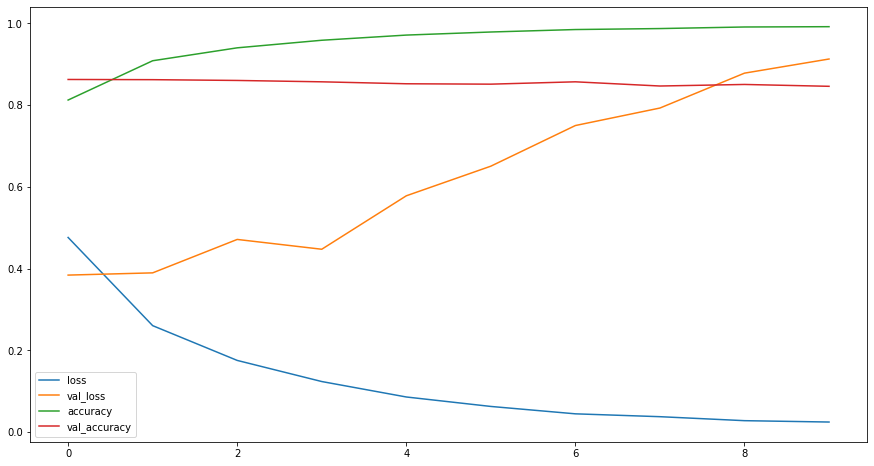

In [125]:
metrics[['loss','val_loss','accuracy','val_accuracy']].plot(figsize=(15,8));